In [1]:
# Import required packages as usual
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

# Simulating Projectile Motion (With numerical integration)

Consider a particle launched at a certain speed. We will for now consider only force as being gravity (g in -y direction).

Recall from your physics course that:

$$ \frac{dx}{dt} = \dot x = v $$
$$ \frac{dv}{dt} = \dot v = \ddot x = a$$

Then:

$$ \int dv = \int a dt$$
$$ v = at$$

Or, moreprecisely, for some finite time:
$$ \Delta v = a \Delta t$$

Similarily (assuming a time independent v)
$$ \int dx = \int v dt$$
$$ x = vt$$

Or for finite time:
$$ \Delta x = v \Delta t$$

For a small enough $\Delta t$ approximating the velocity and acceleration as time independent is a valid assumption to make. This is called numerical integration. Instead of analytically finding a solution, we integrate or sum over finite linear areas. As $\Delta t \to 0$ we get good results.

First we will solve for $v$ and then plug in the value to solve for $x$.

## How do we solve this? We use an integration algorithm (Eulers Method this Week)

The simplest one is the Euler method. You may have heard of this before in calculus. We will apply it first since it is simple. Later we will look at other, better methods (Leapfrog/Midpoint).

The Euler Method goes like this:

$$\bar x_{n+1} = \bar x_n + \bar v\Delta t$$
$$\bar v_{n+1} = \bar v_n + \bar a\Delta t$$

We solve those two equations in sequence over and over. We will use a loop to do this. Since each furture calculation requires a previous one, we need to supply initial conditions. These will be ($v_x$, $v_y$), ($x$,$y$) (We are doing this in 2D but this can be generalized to 3D).

Exapanding the vector form for each component we get the system of equations:

$$ x_{n+1} = x_n + v_x\Delta t$$
$$ y_{n+1} = y_n + v_y\Delta t$$

$$ v_{x(n+1)} = v_{xn} + a_x\Delta t$$
$$ v_{y(n+1)} = v_{yn} + a_y\Delta t$$

We will implement an algorithm to solve these in Python.

In [18]:
def integrate(x, v, dt):
    """
    x is the position vector and v is the velocity vector.
    Integrate one timestep. We also give the timestep to use.
    
    x = x[0]
    y = x[1]
    
    vx = v[0]
    vy = v[1]
    """
    # Define a = [ax, ay]
    a = [0., -9.8]
    
    # Now push position (this is usually called push step)
    x[0] = x[0] + v[0]*dt
    x[1] = x[1] + v[1]*dt
    
    # Push velocity (this is usually called kick step)
    v[0] = v[0] + a[0]*dt
    v[1] = v[1] + a[1]*dt
    

That's all we need to integrate forward one timestep. Rememeber that lists or arrays are mutable so we return nothing (none).

Now let's write a function to call this and collect data for plotting.

In [19]:
def calc_trajectory(vi, theta):
    """
    Given initial v and theta (in degrees) (assume (x,y) = (0,0)), integrate and return
    the values for x, y,vx,vy at each time as np array.
    """
    # Initialize x and v vectors
    x = [0., 0.]
    v = [vi*np.cos(np.radians(theta)), vi*np.sin(np.radians(theta))]
    
    # Decalare timestep
    dt = 0.01
    
    # Lists to store data for plotting. Stores initial conditions to start.
    x_dat = [x[0]]
    y_dat = [x[1]]
    vx_dat = [v[0]]
    vy_dat = [v[1]]
    t = [0.]
    
    # Integrate while the y position is positive (ie stop once we become negative)
    while x[1] >= 0:
        integrate(x, v, dt)
        
        # Save to data array
        x_dat.append(x[0])
        y_dat.append(x[1])
        vx_dat.append(v[0])
        vy_dat.append(v[1])
        t.append(t[-1] + dt)
        
    # Convert to np array and return
    x_dat = np.array(x_dat)
    y_dat = np.array(y_dat)
    vx_dat = np.array(vx_dat)
    vy_dat = np.array(vy_dat)
    t = np.array(t)
    
    return x_dat, y_dat, vx_dat, vy_dat, t

In [20]:
# Now call the function in our code
x, y, vx, vy, t = calc_trajectory(10, 30)

Now that we have the data saved from the function, let's output some plots of it. Then we can see the effect of different timesteps on the motion.  

First, let's plot the time vs y position and the y velocity vs time. We should know what to expect from basic physics.

y = -4.9000 x^2 + 5.0490 x + -0.0000


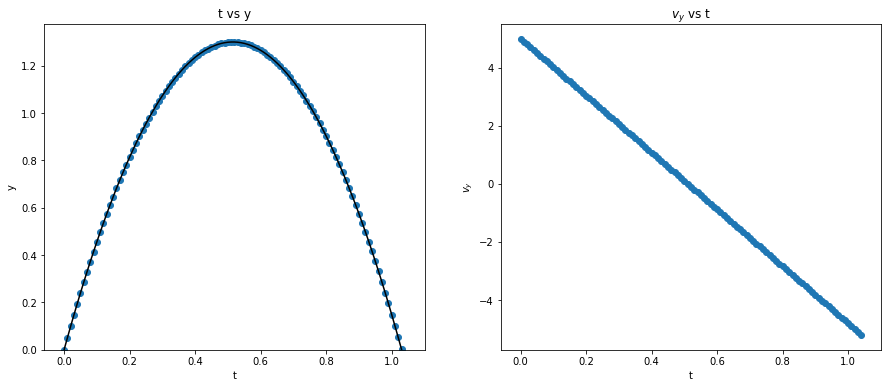

In [21]:
def fit_para(p, x):
    return p[0]*x**2 + p[1]*x + p[2]

def errfunc(p, x, y):
    return fit_para(p, x) - y

p0 = [1., 1., 1.]

p1, success = optimize.leastsq(errfunc, p0[:], args=(t, y))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15, 6])
ax1.set_title("t vs y")
ax2.set_title("$v_y$ vs t")

ax1.set_xlabel("t")
ax1.set_ylabel("y")
ax2.set_xlabel("t")
ax2.set_ylabel("$v_y$")

ax1.scatter(t, y)
ax2.scatter(t, vy)
ax1.set_ylim(0)

ax1.plot(t, fit_para(p1, t), 'k-')

# Show the fit parameters
print("y = %.4f x^2 + %.4f x + %.4f" % (p1[0], p1[1], p1[2]))

Notice the form of the fit:

$$y = \frac{1}{2} a t^2 + v_{yo} t + y_o $$

$$y = \frac{-g}{2}t^2 + v_i sin(\theta) t + 0 $$ 

$$y = -4.9 t^2 + 5.0 t$$ 

So we actually derived exactly what we expect analytically. This is no surprise. We essentially imitated how newton might have graphically derived some of his equations of motion, though he did not have a computer.

In [22]:
# Check values compared to expected
(-9.8/2, 10*np.sin(np.radians(30))), (p1[0], p1[1])

((-4.9, 4.9999999999999991), (-4.9000000036479827, 5.0490000045153165))

We can see the values are very similar. Try making dt smaller. The values will then improve (though the algorithm will run slower). We will see how we can adjust this to make the error even smaller next time.